In [1]:
!module load python/3.6/3.6.5
import sys
sys.path.append("/home/u1/xfang/.local/lib/python3.5/site-packages")

In [2]:
import numpy as np
import pandas as pd
import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
from chainconsumer import ChainConsumer

In [3]:
def DES_single_plot(filename, out, chainnames, paranames, fid_params, colors, id_chains, title, cols):
    c = ChainConsumer()
    for id_chain in id_chains:
        d = pd.read_csv(filename[id_chain], skiprows=5000002, delim_whitespace=True)
        # run1 = d1[:,(0,1)]    
        run = np.array(d.iloc[:,cols]).astype(float)
        c.add_chain(run[0000:,:],parameters=paranames,name =chainnames[id_chain])

    c.configure(shade=True, kde=1.5, shade_alpha=0.2, colors=[colors[id_chain] for id_chain in id_chains], linewidths=1.2, bar_shade=True,label_font_size=25,tick_font_size=18,contour_label_font_size=19)
    #c.configure(shade=[True,False,False],shade_alpha=[0.2,0.2,0.2],linestyles=["--", "-", "-."],linewidths=[0.5,1.,1.],label_font_size=30,tick_font_size=25,contour_label_font_size=30)    
    fig = c.plotter.plot(display=True,truth=fid_params,figsize=2.0)
    fig.suptitle(title, fontsize=25)
    # fig = c.plotter.plot(display=True,truth=[0.3,0.82355,0.97,0.048,0.69,1.5,1.5,1.5,1.5,1.5,0,0,0,0,0],figsize=2.0)
    fig.savefig(out)
    print("Plot saved!")
    matplotlib.pyplot.show()
    return c, fig

In [3]:
%matplotlib inline

In [3]:
!ls -lht /groups/timeifler/xfang/lsstxso/chains/

total 52G
-rw-r--r-- 1 xfang timeifler 3.0G Dec 29 03:24 RomanxSO_10x2pt_modified
-rw-r--r-- 1 xfang timeifler 2.6G Dec 29 03:24 RomanxSO_6x2pt_modified
-rw-r--r-- 1 xfang timeifler 1.7G Dec 28 18:44 RomanxSO_1sample_10x2pt_modified
-rw-r--r-- 1 xfang timeifler 2.5G Dec 28 14:40 RomanxSO_3x2pt_modified
-rw-r--r-- 1 xfang timeifler 2.6G Dec 23 06:35 LSSTxSO_10x2pt_model_1_modified_fix_y_eps12Gamma_nocalib
-rw-r--r-- 1 xfang timeifler 2.6G Dec 21 22:02 LSSTxSO_10x2pt_model_1_modified_shear3000
-rw-r--r-- 1 xfang timeifler 1.1G Dec 21 22:01 LSSTxSO_10x2pt_model_1_modified_fixhalo
-rw-r--r-- 1 xfang timeifler 2.4G Dec 21 22:01 LSSTxSO_10x2pt_model_1_modified_fix_eps12Gamma_nocalib
-rw-r--r-- 1 xfang timeifler 259M Dec 21 22:01 LSSTxSO_10x2pt_model_1_modified_cosmoONLY
-rw-r--r-- 1 xfang timeifler 2.1G Sep  8 04:23 LSSTxSO_8x2pt_model_1_modified_shear3000
-rw-r--r-- 1 xfang timeifler 2.6G Sep  7 15:19 LSSTxSO_6x2pt_model_1_modified_shear3000
-rw-r--r-- 1 xfang timeifler 2.6G Sep  4 09:00 LS

In [28]:
!wc -l LSSTxSO_6x2pt_outlier_model_2-islands_1_1sample; wc -l LSSTxSO_6x2pt_outlier_model_1_1sample

392546 LSSTxSO_6x2pt_outlier_model_2-islands_1_1sample
745610 LSSTxSO_6x2pt_outlier_model_1_1sample


In [42]:
!wc -l LSSTxSO_6x2pt_model_1; wc -l LSSTxSO_3x2pt_model_1

3223826 LSSTxSO_6x2pt_model_1
3299402 LSSTxSO_3x2pt_model_1


In [7]:
!head -n3 LSSTxSO_10x2pt_model_1_modified

# omega_m    sigma_8    n_s    omega_b    h0    bias_0    bias_1    bias_2    bias_3    bias_4    bias_5    bias_6    bias_7    bias_8    bias_9    A_ia    eta_ia    gas_0    gas_1    gas_2    gas_3    gas_7    gas_8    gas_9    gas_10 log_like
#blind=False
0.3221207688275788  0.8421382771679866  0.9552192232995741  0.04957982952765583  0.6548250449840423  1.0414735752325432  1.6584729710835093  1.3127072900148173  1.475571194180941  1.5715626665251217  1.7776696516777464  1.6552997955123008  2.1257928753387967  2.305492299559572  2.2652157274190508  0.6611487464226239  0.10527008427950749  1.176180807986958  0.5984036961385069  13.941746568973231  0.970910294462713  6.524339603555226  0.747661918249418  0.032830618035641426  -0.02018614927669968 -2.961657e+03


In [4]:
!tail -n3 LSSTxSO_10x2pt_model_1_modified

0.31856107426992336  0.8280947799665933  0.955993759817731  0.052222763960697145  0.6869285660840692  1.2136312024934248  1.327587211303407  1.42069161907974  1.5139083893972285  1.5883397985549483  1.667910127646547  1.774686412034595  1.872944597243522  1.9814886117702355  2.089296038488244  0.5038115565234084  0.0670641396195823  1.1702098526997706  0.623856617478692  13.995496701192781  0.9252143892753789  6.485739944097004  0.7452806247599614  -0.2539240326185001  -0.07955615109698828 -9.052764e+00
0.31438622998845106  0.8316448868761462  0.961484871606128  0.05003222722508894  0.6866864958510029  1.2012598930038936  1.3045707212321984  1.4044365183374177  1.4944643268519298  1.577362579366327  1.675750086543003  1.7706230223264694  1.855391983953413  1.9636059942505395  2.0987262617279243  0.4796812111952118  0.21955602332210206  1.1697411735092245  0.5722355386743863  14.0571461692227  0.9987490927029551  6.465236332266747  0.7723119028644269  -0.14401869806201156  -0.2778215385

In [9]:
!grep "e+15"  LSSTxSO_10x2pt_model_1_modified | wc -l

0


In [25]:
!ls -lht /groups/timeifler/xfang/lsstxso/WFIRSTwidexSO_6x2pt_model

total 44G
-rw-r--r-- 1 xfang cosmo     5.7G Nov 30 17:01 WFIRSTwidexSO_6x2pt_model
-rw-r--r-- 1 xfang cosmo     9.7G Nov  7 19:57 WFIRSTwidexSO_k3x2pt_model
-rw-r--r-- 1 xfang cosmolike 1.3G Nov  2 10:03 WFIRSTwidexSO_kk_model
-rw-r--r-- 1 xfang cosmo     7.2G Oct 27 17:04 WFIRSTwidexSO_3x2pt_model
-rw-r--r-- 1 xfang cosmo     4.2G Oct 10 14:19 LSSTxSO_6x2pt_model_1_1sample
-rw-r--r-- 1 xfang cosmo     5.2G Oct  3 04:18 LSSTxSO_6x2pt_model_1
-rw-r--r-- 1 xfang cosmo     5.2G Oct  1 20:39 LSSTxSO_3x2pt_model_1
-rw-r--r-- 1 xfang cosmo     5.2G Sep  5  2020 LSSTxSO_6x2pt_model_0


In [3]:
!ls -lht 

total 1.8G
-rw-r--r-- 1 xfang timeifler 1.6G Dec 30 05:50 LSSTxSO_Y6_1sample_10x2pt_modified
-rw-r--r-- 1 xfang timeifler 247M Dec 30 05:50 RomanxSO_1sample_10x2pt_modified
-rw-r--r-- 1 xfang timeifler 1.3M Dec 29 03:52 Plot_chains-Copy1.ipynb


In [25]:
title = 'LSST x SO 3x2pt'
filename = ["LSSTxSO_6x2pt_model_0", "LSSTxSO_6x2pt_model_1","DESY6_6x2_40-3000_15_cross"]
chainnames = ["LSSTY1 x SOY1 6x2pt", "LSSTY6 x SOY5 6x2pt","DESY6 x Planck 6x2pt cross-survey cov"]
paranames=[r"$\Omega_m$", r"$\sigma_8$", r"$n_s$"]
fid_params = [0.3156,0.831,0.9645]
cols = (0,1,2)
outfile = "lsstxso_6x2pt.pdf"
colors = ["r","b","g"]

In [13]:
title = 'LSST x SO 3x2pt'
filename = ["/xdisk/timeifler/xfang/lsstxso/chains/LSSTxSO_3x2pt_model_1_modified_shear3000", "LSSTxSO_3x2pt_model_1_modified_shear3000"]
chainnames = ["old", "new"]
paranames=["Omega-m", "sigma-8"]
fid_params = [0.3156,0.831]
cols = [0,1]
outfile = "lsstxso_3x2pt_test.pdf"
colors = ["r","b"]

In [22]:
matplotlib.rcParams['text.usetex'] = False

In [25]:
DES_single_plot(filename,outfile,chainnames,paranames, fid_params, colors,[0,1], title,cols)

RuntimeError: Failed to process string with tex because dvipng could not be found

RuntimeError: Failed to process string with tex because dvipng could not be found

<Figure size 600x600 with 4 Axes>

In [9]:
paranames=[r"$\Omega_m$", r"$\sigma_8$"]
fid_params = [0.3156,0.831]
cols = (0,1)
outfile = "lsstxso_3x2pt_omm-sig8.pdf"
colors = ["r","b","g"]
DES_single_plot(filename,outfile,chainnames,paranames, fid_params, colors,[0,1], title, cols)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


Plot saved!


In [5]:
d = pd.read_csv("/groups/timeifler/xfang/lsstxso/chains/LSSTxSO_3x2pt_model_1_modified_shear3000", skiprows=(2+3500000) ,delim_whitespace=True)

In [7]:
d = pd.read_csv("RomanxSO_1sample_10x2pt_modified", skiprows=(2+00000) ,delim_whitespace=True)

In [4]:
d = pd.read_csv("LSSTxSO_Y6_3x2pt_modified", skiprows=(2+000000), delim_whitespace=True)

In [9]:
d2 = pd.read_csv("LSSTxSO_Y6_1sample_10x2pt_modified", skiprows=(2+000000), delim_whitespace=True)

In [15]:
wa = np.array(d.iloc[:,4]).astype(float)

In [108]:
print((wa[40000:])[(wa[40000:])>3].size)

0


In [96]:
print(wa[40000:].size)

2009575


In [13]:
!head -n5 /groups/timeifler/xfang/lsstxso/chains/RomanxSO_1sample_10x2pt_modified | tail -n1

0.31916652771880416  0.8512697411825932  0.9636200187852797  0.049041466871077945  0.6843766020624803  1.0017503059464368  2.0159073647859826  1.7942766997180923  1.556647313260681  1.5566049631789591  2.1889310048603288  2.4430509664190243  2.335335090685004  2.9699485036035105  5.102453342199032  0.49811014264510295  0.0015980752426600895  1.1768524807744538  0.6044570481825374  14.017809831612613  0.9630342604129976  6.537628619565994  0.7525928837377788  -0.05779097340855674  -0.010068439929890224 -1.000000e+15


In [10]:
print(d.iloc[1])

0.3199314883483318       3.191665e-01
0.8068359192172749       8.512697e-01
0.9799872122306752       9.636200e-01
0.04875969816459869      4.904147e-02
0.682330258044686        6.843766e-01
1.2159922395392455       1.001750e+00
1.4467981680937039       2.015907e+00
1.6924175413624072       1.794277e+00
1.6502352754532184       1.556647e+00
1.7447619350206067       1.556605e+00
2.0061464538184803       2.188931e+00
2.361848645971619        2.443051e+00
2.6371067241355517       2.335335e+00
3.0817438509985067       2.969949e+00
4.783296661633736        5.102453e+00
0.37731771054792057      4.981101e-01
0.01584854015029967      1.598075e-03
1.1717228733755438       1.176852e+00
0.6025470741349596       6.044570e-01
14.028471821888102       1.401781e+01
0.9903995710984757       9.630343e-01
6.517483504324241        6.537629e+00
0.7548074887038467       7.525929e-01
-0.06258569926630488    -5.779097e-02
-0.021805868507404964   -1.006844e-02
-4.877128e+03           -1.000000e+15
Name: 1, dty

In [3]:
import matplotlib.pyplot as plt

63167
[-3.499354e+03 -1.028803e+04 -1.128681e+04 ... -7.761985e+00 -5.091015e+00
 -1.349666e+01]


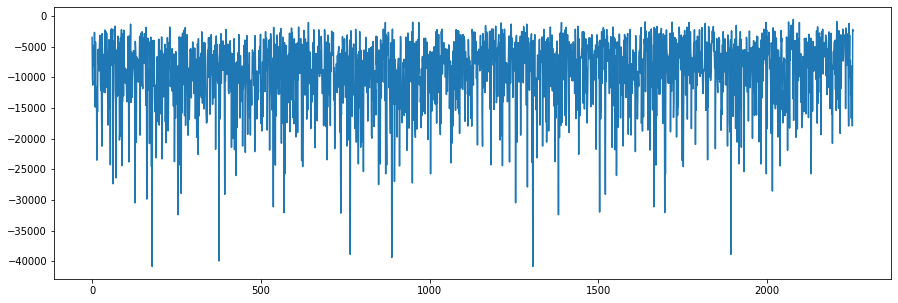

In [5]:
like = np.array(d.iloc[:,-1]).astype(float)
print(like.size)
print(like)
plt.figure(figsize=(15,5))
likeplot = plt.plot(np.arange(2256), like[:2256])
# plt.ylim(0.3,0.35)
# plt.savefig("likeplot.png")
plt.show()

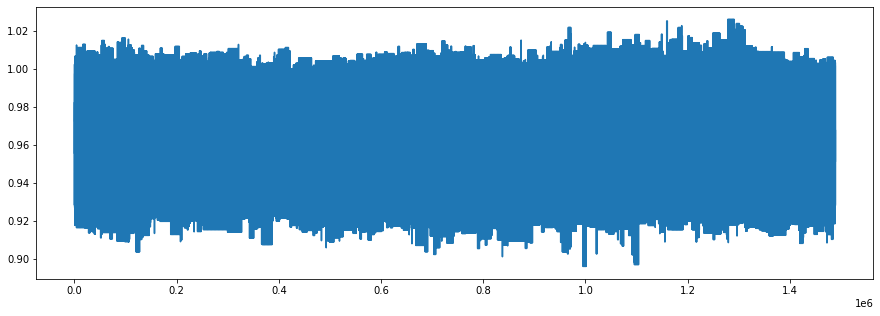

/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


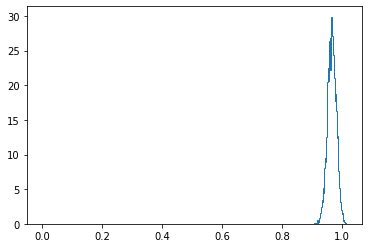

nan +/- nan


/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/_methods.py:185: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [10]:
x = np.array(d.iloc[00000:,2]).astype(float)
ns = x
plt.figure(figsize=(15,5))
plt.plot(np.arange(x.size), x)
# plt.savefig("w0plot.png")
plt.show()
plt.hist(x[650000:850000],bins=100,histtype='step',density=True)
plt.hist(x[3000000:],bins=100,histtype='step',density=True)
plt.show()
print("%.4f +/- %.4f"%(np.mean(x[3000000:]), np.std(x[3000000:])))

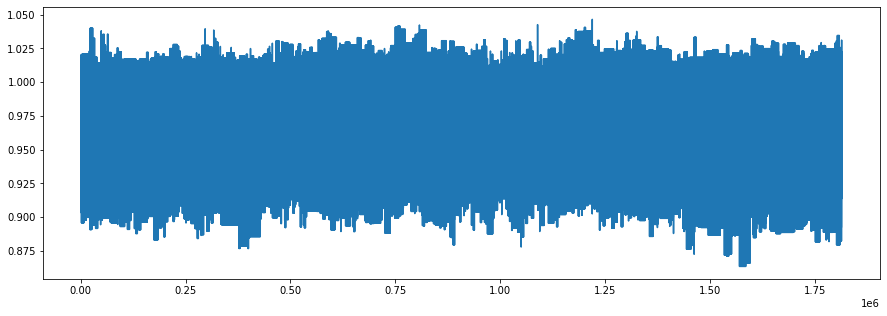

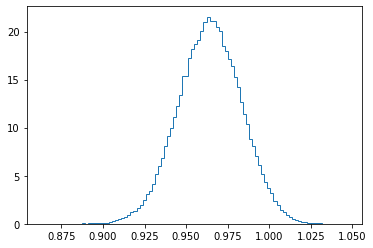

nan +/- nan


/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/_methods.py:185: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [7]:
x = np.array(d2.iloc[00000:,2]).astype(float)
ns2 = x
plt.figure(figsize=(15,5))
plt.plot(np.arange(x.size), x)
# plt.savefig("w0plot.png")
plt.show()
# plt.hist(x[650000:850000],bins=100,histtype='step',density=True)
plt.hist(x,bins=100,histtype='step',density=True)
plt.show()
print("%.4f +/- %.4f"%(np.mean(x[2000000:]), np.std(x[2000000:])))

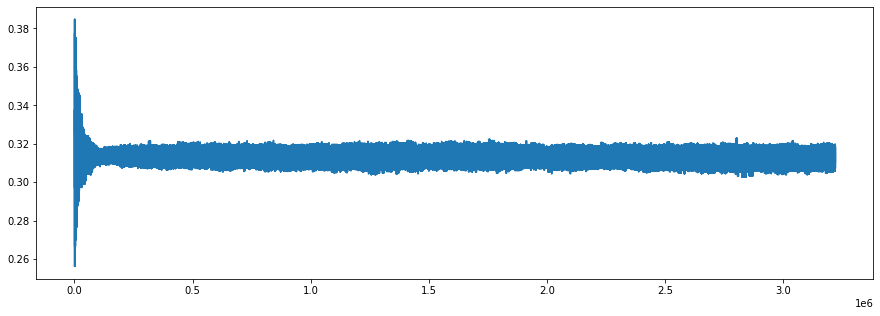

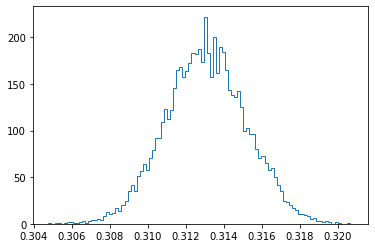

In [10]:
x2 = np.array(d2.iloc[00000:,0]).astype(float)
omm2 = x2
plt.figure(figsize=(15,5))
plt.plot(np.arange(x2.size), x2)
# plt.savefig("w0plot.png")
plt.show()
# plt.hist(x2[650000:850000],bins=100,histtype='step',density=True)
plt.hist(x2[-100000:],bins=100,histtype='step',density=True)
plt.show()
# print("%.4f +/- %.4f"%(np.mean(x2[2000000:]), np.std(x2[2000000:])))

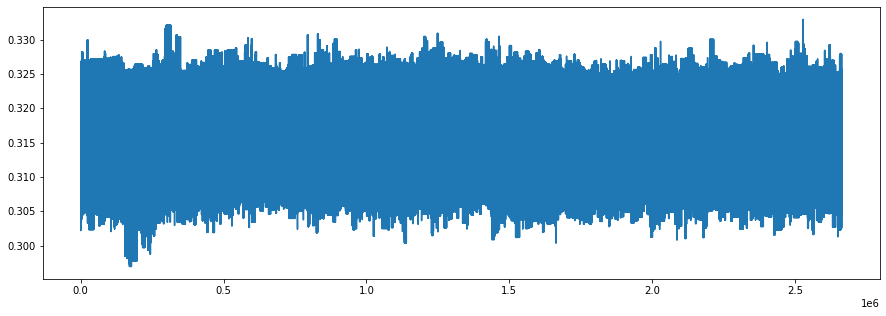

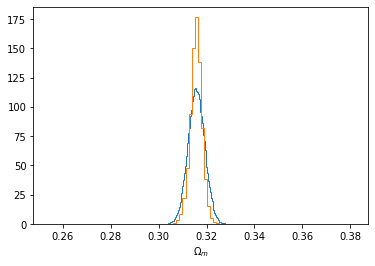

In [39]:
x = np.array(d.iloc[00000:,0]).astype(float)
omm = x
plt.figure(figsize=(15,5))
plt.plot(np.arange(x.size), x)
# plt.savefig("w0plot.png")
plt.show()
# plt.hist(x[650000:850000],bins=100,histtype='step',density=True)
# plt.hist(x[3000000:],bins=100,histtype='step',density=True)
# plt.hist(x2[2000000:],bins=100,histtype='step',density=True)

plt.hist(x,bins=100,histtype='step',density=True)
# plt.hist(x[3000000:],bins=100,histtype='step',density=True)
plt.hist(x2[:-800000],bins=100,histtype='step',density=True)
plt.xlabel(r'$\Omega_m$')
plt.show()
# print("%.4f +/- %.4f"%(np.mean(x[3000000:]), np.std(x[3000000:])))

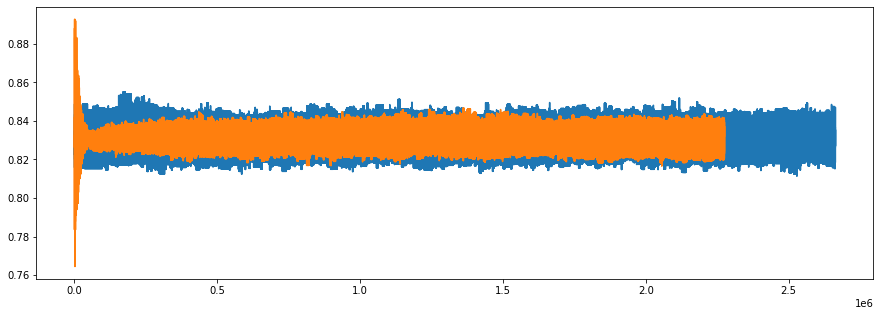

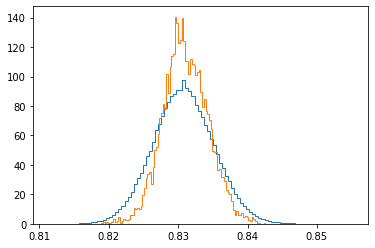

0.8307 +/- 0.0044
0.8310 +/- 0.0033


In [35]:
x = np.array(d.iloc[00000:,1]).astype(float)
x2 = np.array(d2.iloc[00000:,1]).astype(float)
sig82 = x2
sig8 = x
plt.figure(figsize=(15,5))
plt.plot(np.arange(x.size), x)
plt.plot(np.arange(x2.size), x2)
# plt.savefig("w0plot.png")
plt.show()
plt.hist(x,bins=100,histtype='step',density=True)
# plt.hist(x,bins=100,histtype='step',density=True)
plt.hist(x2[-100000:],bins=100,histtype='step',density=True)
plt.show()
print("%.4f +/- %.4f"%(np.mean(x), np.std(x)))
print("%.4f +/- %.4f"%(np.mean(x2[-100000:]), np.std(x2[-100000:])))

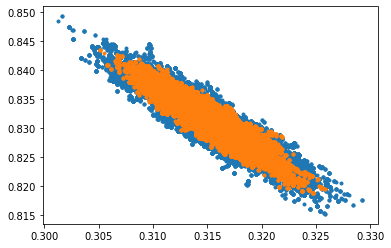

In [40]:
plt.plot(omm[-100000:],sig8[-100000:],'.')
plt.plot(omm2[-100000:],sig82[-100000:],'.')

plt.show()

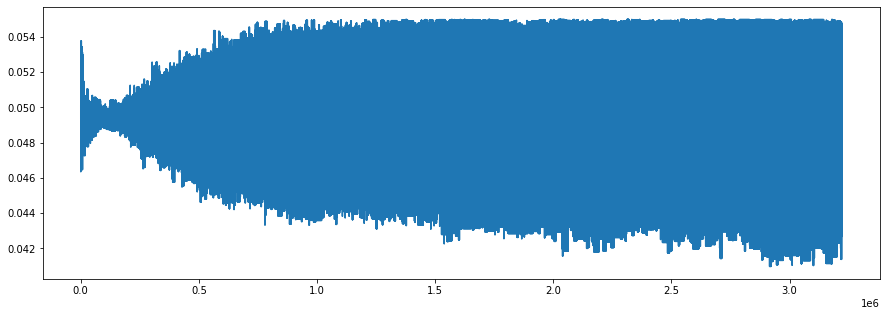

In [14]:
# x = np.array(d.iloc[00000:,1]).astype(float)
x2 = np.array(d2.iloc[00000:,3]).astype(float)
# sig82 = x2
# sig8 = x
plt.figure(figsize=(15,5))
# plt.plot(np.arange(x.size), x)
plt.plot(np.arange(x2.size), x2)
# plt.savefig("w0plot.png")
plt.show()

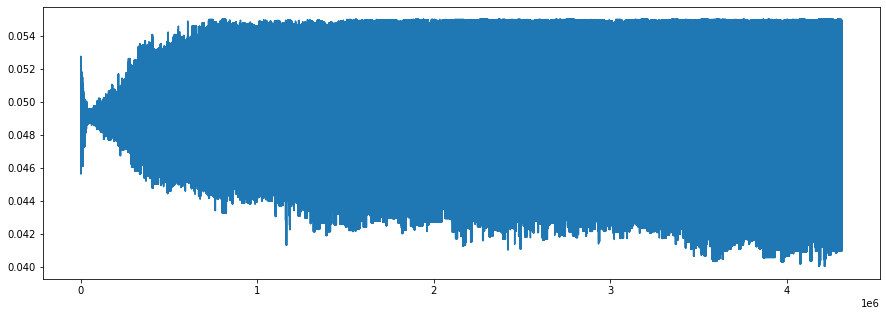

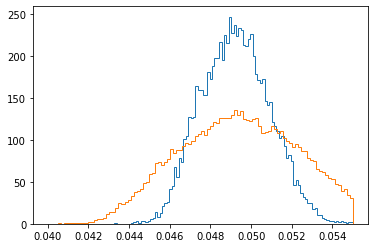

0.0493 +/- 0.0028


In [22]:
x = np.array(d.iloc[00000:,3]).astype(float)
omb = x
plt.figure(figsize=(15,5))
plt.plot(np.arange(x.size), x)
# plt.savefig("w0plot.png")
plt.show()
plt.hist(x[650000:850000],bins=100,histtype='step',density=True)
plt.hist(x[3000000:],bins=100,histtype='step',density=True)
plt.show()
print("%.4f +/- %.4f"%(np.mean(x[3000000:]), np.std(x[3000000:])))

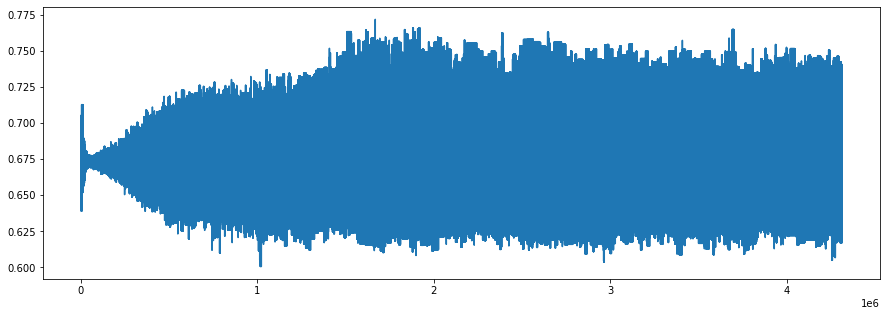

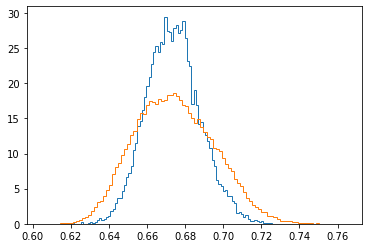

0.6744 +/- 0.0208


In [23]:
x = np.array(d.iloc[00000:,4]).astype(float)
h0 = x
plt.figure(figsize=(15,5))
plt.plot(np.arange(x.size), x)
# plt.savefig("w0plot.png")
plt.show()
plt.hist(x[650000:850000],bins=100,histtype='step',density=True)
plt.hist(x[3000000:],bins=100,histtype='step',density=True)
plt.show()
print("%.4f +/- %.4f"%(np.mean(x[3000000:]), np.std(x[3000000:])))

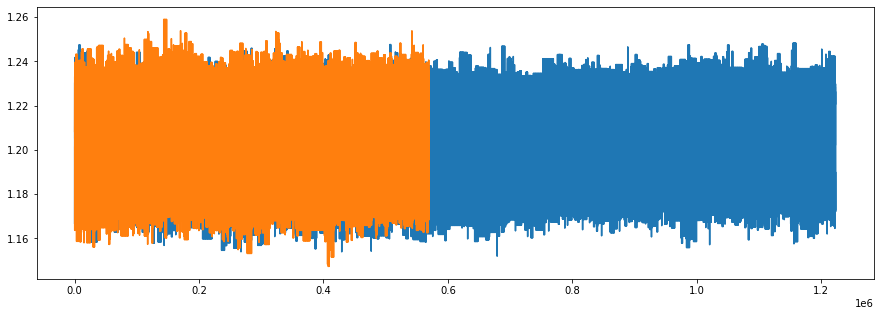

/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


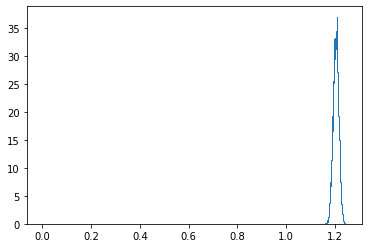

/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/_methods.py:185: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan +/- nan


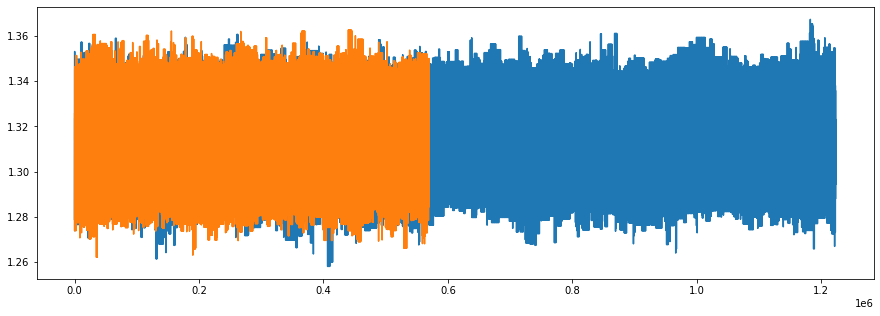

/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


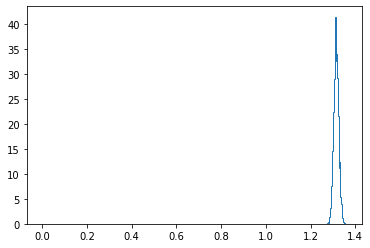

/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/_methods.py:185: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan +/- nan


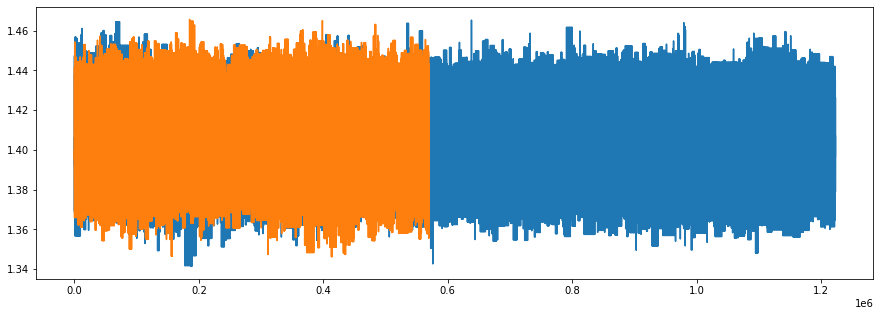

/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


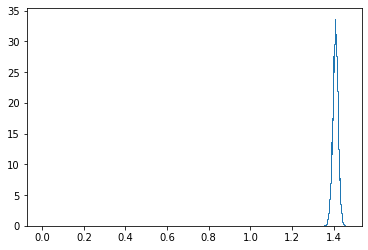

/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/_methods.py:185: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan +/- nan


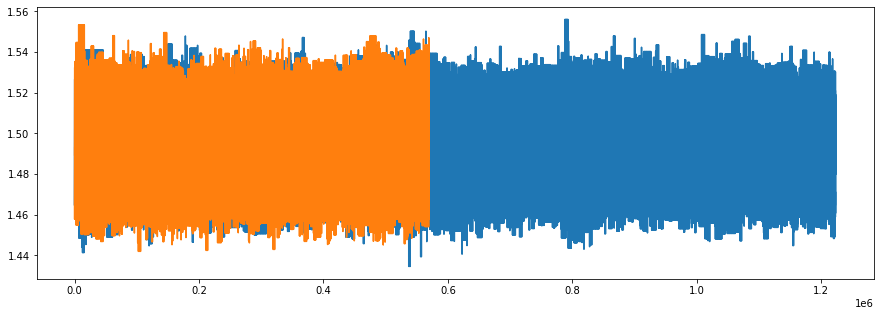

/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


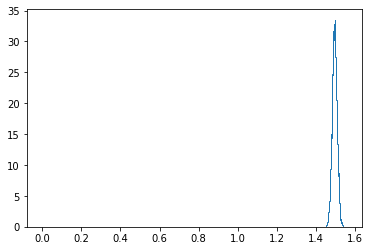

/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/_methods.py:185: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan +/- nan


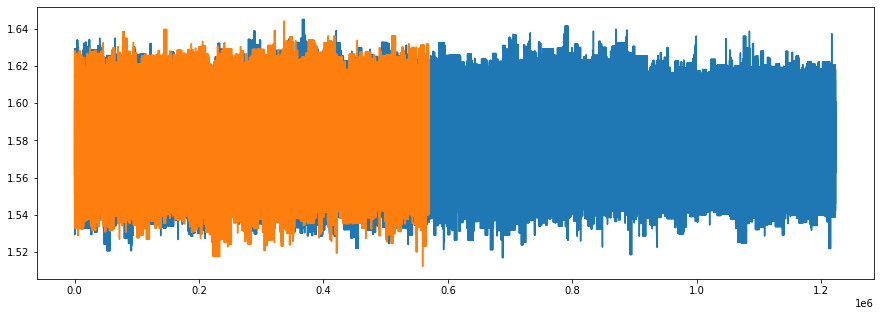

/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


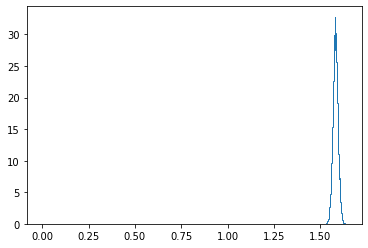

/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/_methods.py:185: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan +/- nan


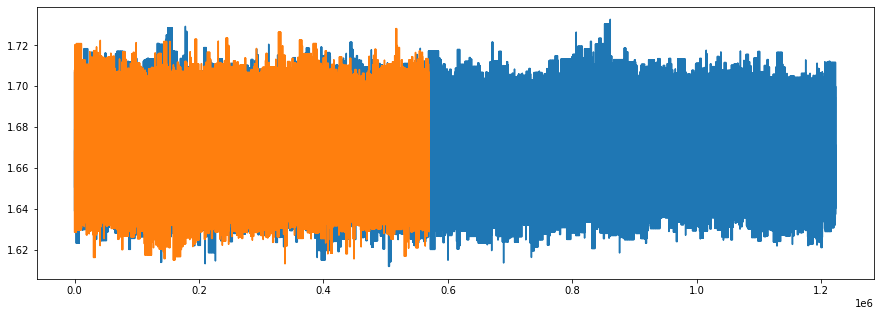

/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


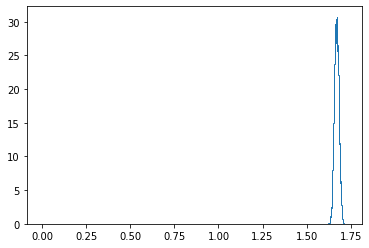

/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/_methods.py:185: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan +/- nan


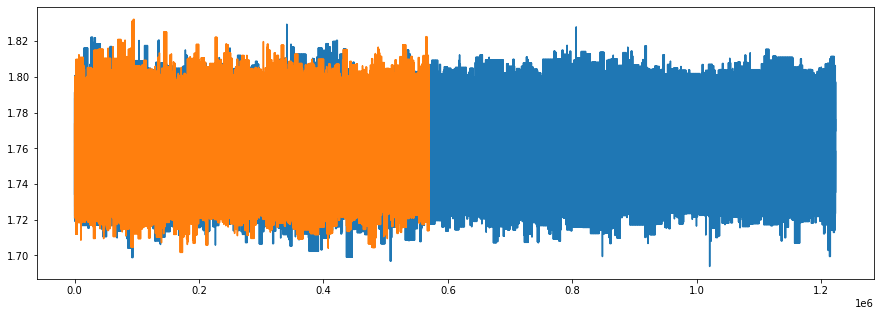

/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


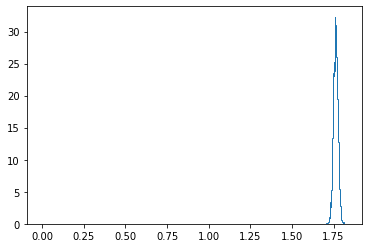

/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/_methods.py:185: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan +/- nan


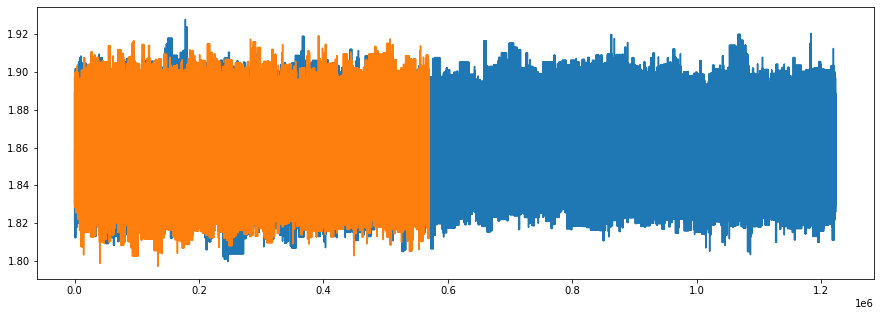

/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


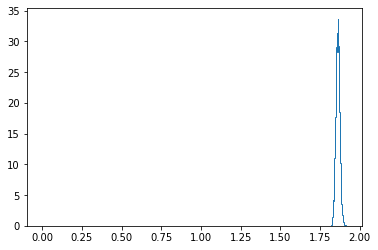

/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/_methods.py:185: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan +/- nan


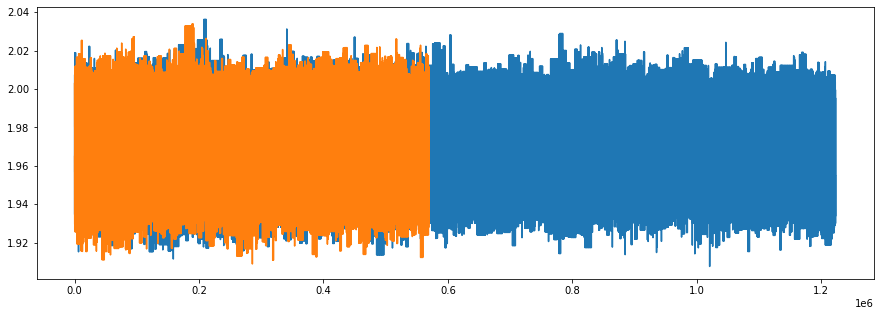

/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


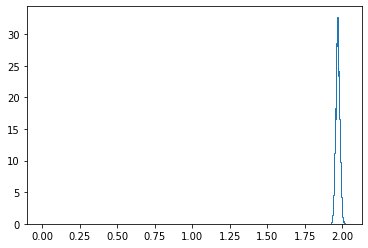

/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/_methods.py:185: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan +/- nan


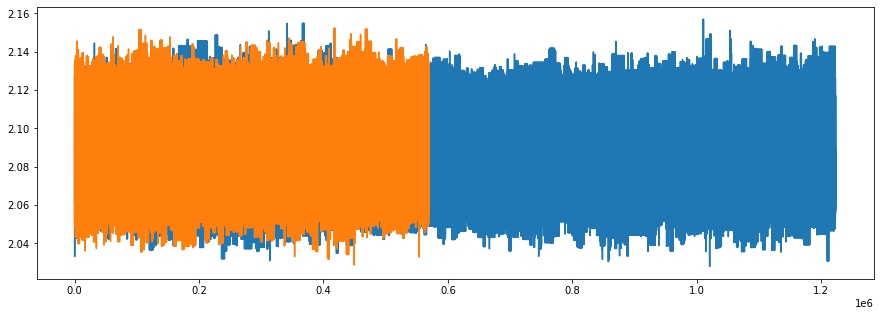

/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


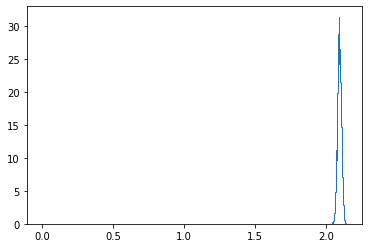

nan +/- nan


/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/_methods.py:185: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [60]:
for i in range(10):
    x = np.array(d.iloc[00000:,5+i]).astype(float)
    x2 = np.array(d2.iloc[00000:,5+i]).astype(float)
    gbias = x
    plt.figure(figsize=(15,5))
    plt.plot(np.arange(x.size), x)
    plt.plot(np.arange(x2.size), x2)
    # plt.savefig("w0plot.png")
    plt.show()
    plt.hist(x[650000:850000],bins=100,histtype='step',density=True)
    plt.hist(x[3000000:],bins=100,histtype='step',density=True)
    plt.hist(x2[2000000:],bins=100,histtype='step',density=True)
    plt.show()
    print("%.4f +/- %.4f"%(np.mean(x[3000000:]), np.std(x[3000000:])))

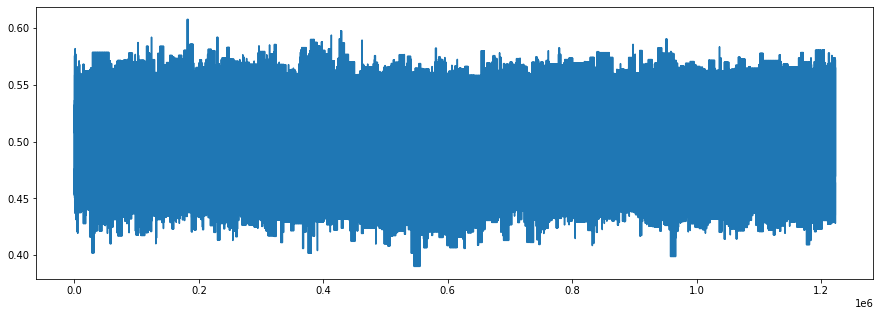

/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


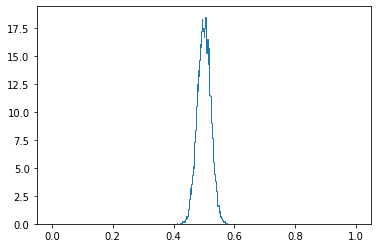

nan +/- nan


/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/_methods.py:185: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [47]:
x = np.array(d.iloc[00000:,15]).astype(float)
A_ia = x
plt.figure(figsize=(15,5))
plt.plot(np.arange(x.size), x)
# plt.savefig("w0plot.png")
plt.show()
plt.hist(x[650000:850000],bins=100,histtype='step',density=True)
plt.hist(x[3000000:],bins=100,histtype='step',density=True)
plt.show()
print("%.4f +/- %.4f"%(np.mean(x[3000000:]), np.std(x[3000000:])))

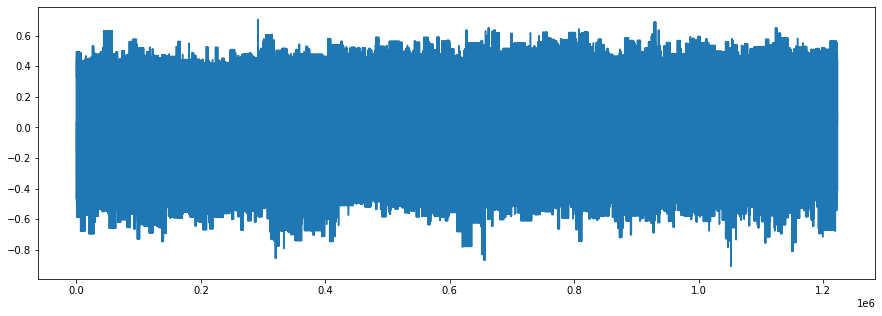

/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


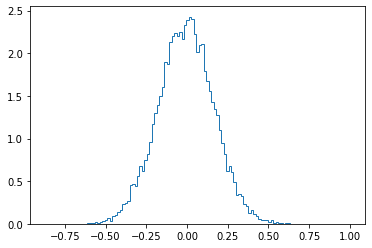

nan +/- nan


/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/_methods.py:185: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/opt/ohpc/pub/apps/python/3.8.2/lib/python3.8/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [48]:
x = np.array(d.iloc[00000:,16]).astype(float)
eta_ia = x
plt.figure(figsize=(15,5))
plt.plot(np.arange(x.size), x)
# plt.savefig("w0plot.png")
plt.show()
plt.hist(x[650000:850000],bins=100,histtype='step',density=True)
plt.hist(x[3000000:],bins=100,histtype='step',density=True)
plt.show()
print("%.4f +/- %.4f"%(np.mean(x[3000000:]), np.std(x[3000000:])))

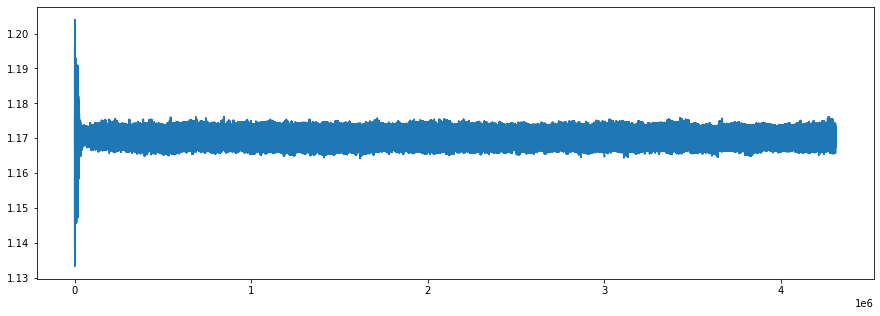

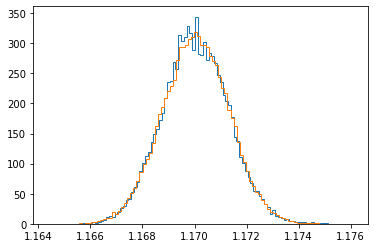

1.1700 +/- 0.0013


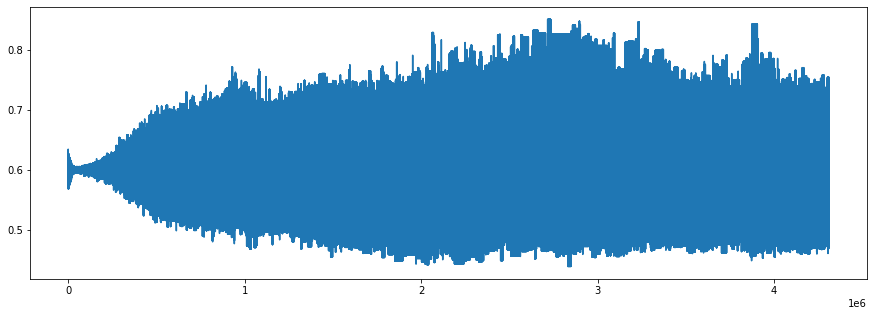

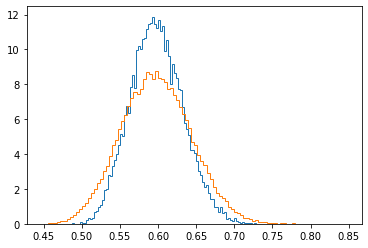

0.5975 +/- 0.0458


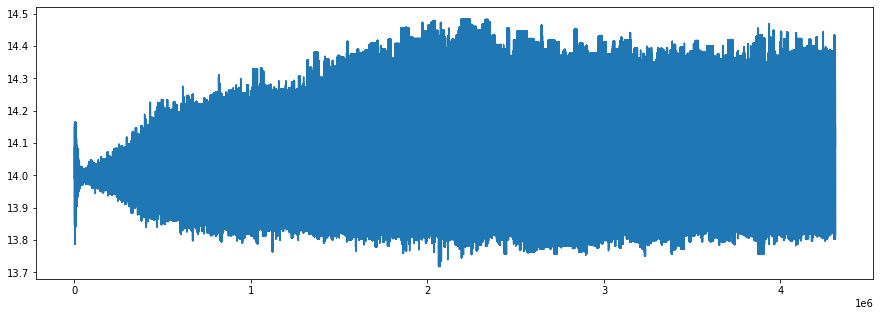

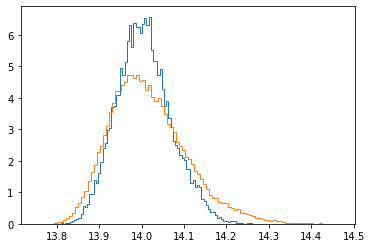

14.0154 +/- 0.0902


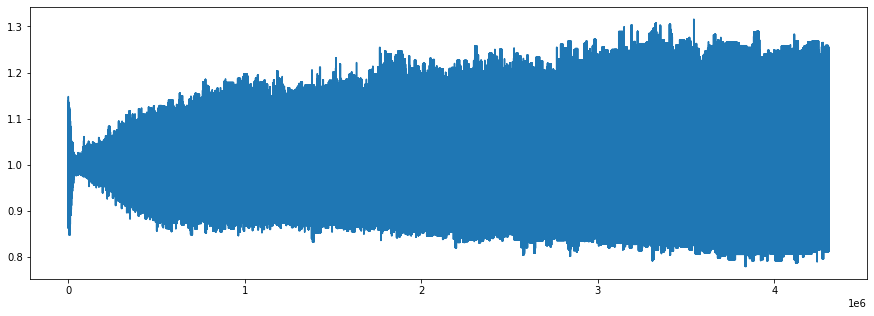

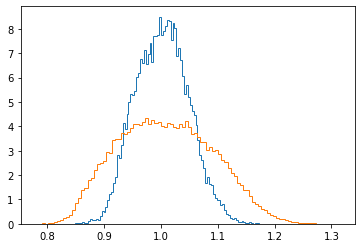

1.0081 +/- 0.0827


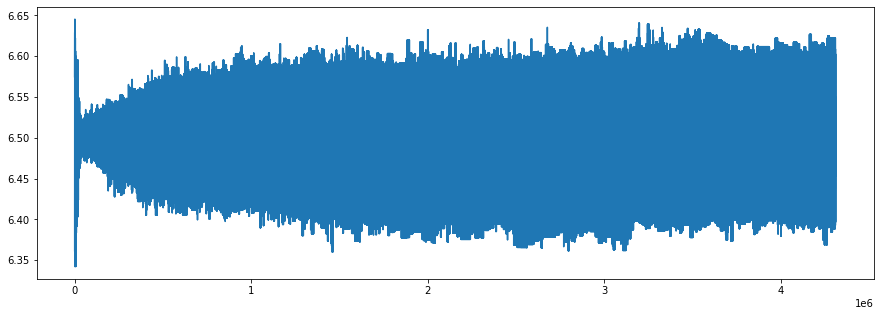

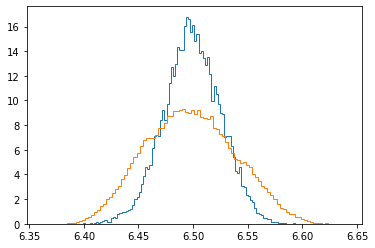

6.4973 +/- 0.0407


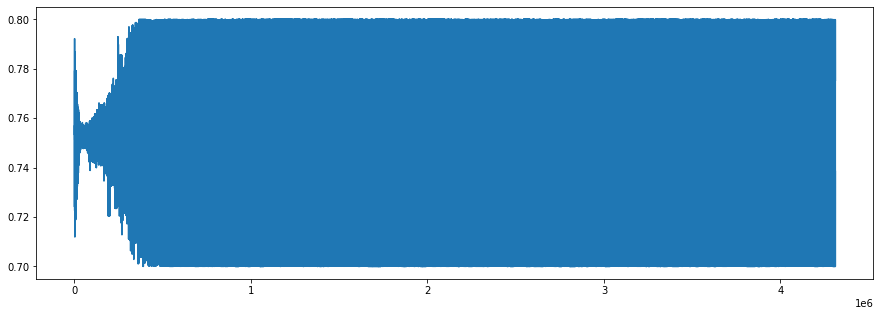

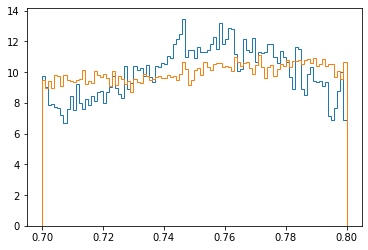

0.7512 +/- 0.0288


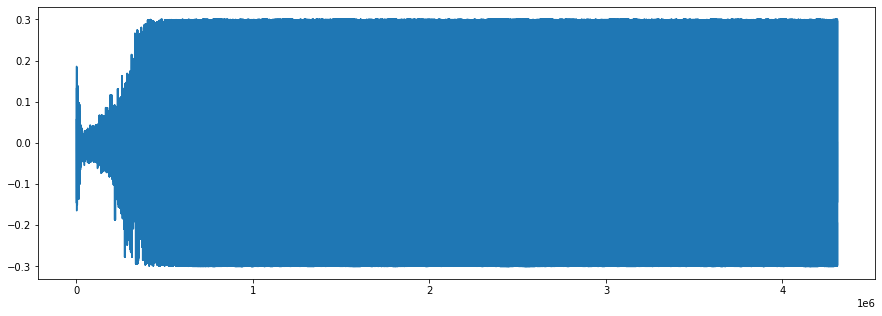

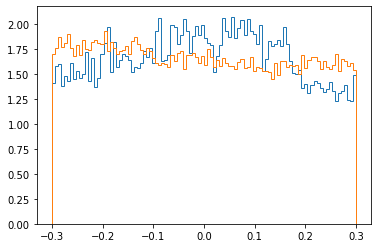

-0.0076 +/- 0.1742


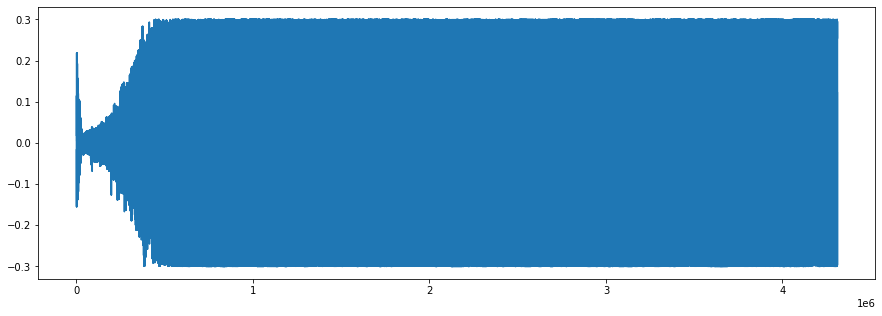

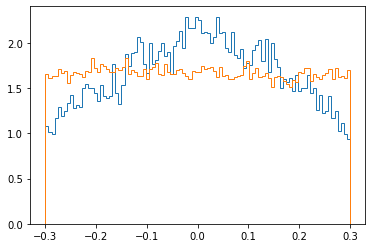

-0.0018 +/- 0.1728


In [27]:
for i in range(8):
    x = np.array(d.iloc[00000:,17+i]).astype(float)
    pgas = x
    plt.figure(figsize=(15,5))
    plt.plot(np.arange(x.size), x)
    # plt.savefig("w0plot.png")
    plt.show()
    plt.hist(x[650000:850000],bins=100,histtype='step',density=True)
    plt.hist(x[3000000:],bins=100,histtype='step',density=True)
    plt.show()
    print("%.4f +/- %.4f"%(np.mean(x[3000000:]), np.std(x[3000000:])))

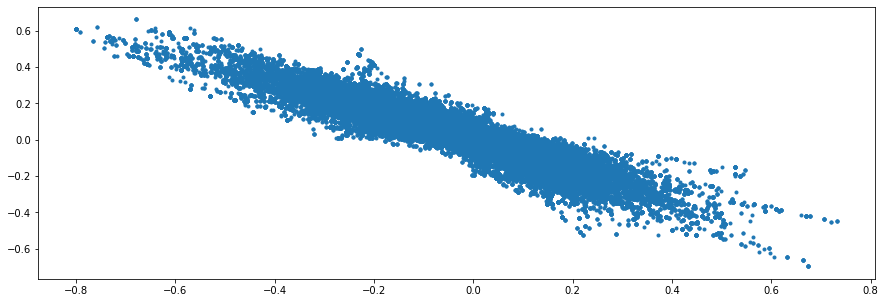

In [58]:
eps1 = np.array(d2.iloc[-100000:,19]).astype(float)
eps2 = np.array(d2.iloc[-100000:,20]).astype(float)

plt.figure(figsize=(15,5))
plt.plot(eps1, eps2, '.')
plt.show()

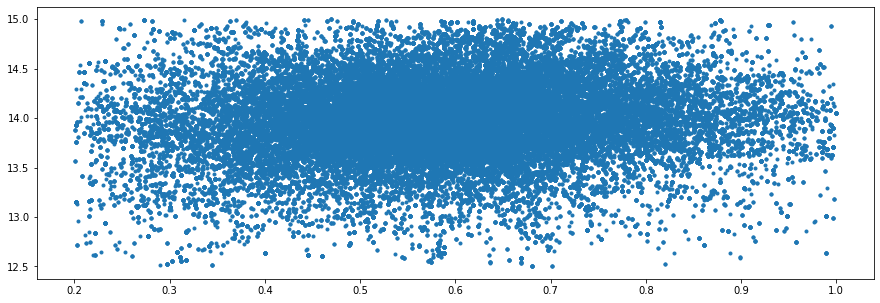

In [60]:
beta = np.array(d2.iloc[-100000:,17]).astype(float)
lgM0 = np.array(d2.iloc[-100000:,18]).astype(float)

plt.figure(figsize=(15,5))
plt.plot(beta, lgM0, '.')
plt.show()

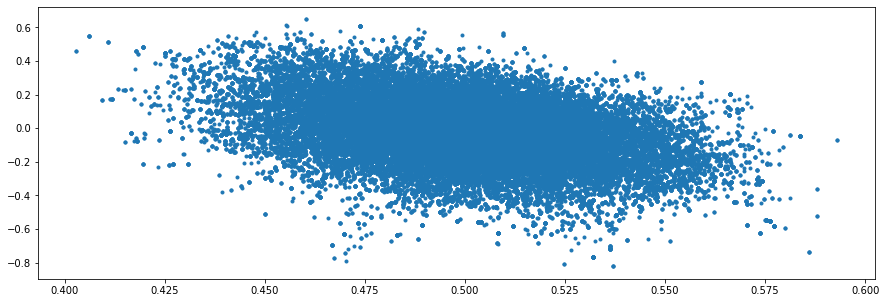

In [61]:
Aia = np.array(d2.iloc[-100000:,15]).astype(float)
etaia = np.array(d2.iloc[-100000:,16]).astype(float)

plt.figure(figsize=(15,5))
plt.plot(Aia, etaia, '.')
plt.show()

In [28]:
!ls /xdisk/timeifler/mig2020/extra/xfang/lsstxso/ -lht

total 20G
-rw-r--r-- 1 xfang cosmo 4.2G Oct 10 14:19 LSSTxSO_6x2pt_model_1_1sample
-rw-r--r-- 1 xfang cosmo 5.2G Oct  3 04:18 LSSTxSO_6x2pt_model_1
-rw-r--r-- 1 xfang cosmo 5.2G Oct  1 20:39 LSSTxSO_3x2pt_model_1
-rw-r--r-- 1 xfang cosmo 5.2G Sep  5 09:53 LSSTxSO_6x2pt_model_0


In [13]:
!head -n1 WFIRSTwidexSO_kk_model

# omega_m    sigma_8    n_s    w0    wa    omega_b    h0    bary_0    bary_1    bary_2 log_like


In [23]:
!ls

LSSTxSO_10x2pt_model_1_modified  Plot_chains-Copy1.ipynb


In [24]:
!ls ..

3516012.err
3516012.out
Makefile
README.md
Untitled-Copy1.ipynb
Untitled.ipynb
Untitled1.ipynb
__pycache__
chains
chi2.ipynb
cmblensrec
compute_covariances_fourier.c
compute_covariances_fourier_10x2pt
compute_covariances_fourier_10x2pt.c
compute_covariances_fourier_10x2pt_fft
compute_covariances_fourier_10x2pt_slow
compute_covariances_fourier_10x2pt_ssc
compute_covariances_fourier_10x2pt_ssc.c
cosmolike_libs_LSSTxSO_10x2pt.py
cosmolike_libs_LSSTxSO_10x2pt_calib.py
cov
cov_lsstxso_10x2pt_fft
cov_lsstxso_10x2pt_fft_comp
cov_lsstxso_10x2pt_lmax7979
cov_lsstxso_10x2pt_lmax7979_comp
cov_lsstxso_10x2pt_slow_lmax3000
cov_lsstxso_10x2pt_slow_lmax7979
cov_lsstxso_10x2pt_ssc_lmax7979
cov_lsstxso_6x2pt_slow_lmax3000
cov_y6_10x2pt_lmax3000
datav
env
files.py
files.txt
init_LSSxCMB.c
like_fourier_10x2pt.c
like_fourier_10x2pt_fft.so
out_cov_lsstxso_10x2pt
out_cov_lsstxso_10x2pt_fft
out_cov_lsstxso_10x2pt_slow
out_cov_lsstxso_10x2pt_slow_lmax3000
out_cov_lsstxso_10x2pt_ssc
slurm_chain
slurm_cov
xfang